In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import html
import re

from sklearn import preprocessing, decomposition
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


pd.pandas.set_option('display.max_columns', 100)
pd.pandas.set_option('display.max_rows', 100)
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.3f' % x)
warnings.simplefilter(action='ignore', category=FutureWarning)
              
sns.set()

!python --version
print('\n'.join(f'{m.__name__} {m.__version__}' 
                for m in globals().values() 
                if getattr(m, '__version__', None)))

Python 3.9.18
pandas 2.1.4
numpy 1.26.2
seaborn 0.12.2
re 2.2.1


In [2]:
df = pd.read_csv('Data/df.csv', low_memory=False)
df.head()

,code,states_fr,countries_fr,categories_tags,categories_fr,main_category_fr,product_name,quantity,packaging_tags,additives,additives_tags,additives_n,nutrition_grade_fr,nutrition-score-fr_100g,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,calcium_100g,alcohol_100g
0,40608754,"A vérifier,Complet,Informations nutritionnelle...",FRANCE,"beverages,carbonated drinks,sodas,colas,sugare...","Boissons,Boissons gazeuses,Sodas,Sodas au cola...",Sodas,"pepsi, nouveau goût !",15 cl,canette-aluminium,[ eau-gazeifiee -> fr:eau-gazeifiee ] [ eau...,"en:e150d,en:e338",2.000,e,13.000,beverages,sweetened beverages,177.000,0.000,0.000,10.400,10.400,0.000,0.000,0.025,0.010,NaN,0.000
1,87177756,"A vérifier,Complet,Informations nutritionnelle...",FRANCE,"beverages,plant based beverages,carbonated dri...","Aliments et boissons à base de végétaux,Boisso...",Sodas aux fruits,7up,33 cl,canette,[ eau-gazeifiee -> fr:eau-gazeifiee ] [ eau...,"en:e330,en:e296,en:e331",3.000,e,13.000,beverages,sweetened beverages,177.000,0.000,0.000,10.400,10.400,NaN,0.000,0.100,0.039,NaN,0.000
2,10,"A vérifier,Complet,Informations nutritionnelle...",FRANCE,"sugary snacks,biscuits and cakes,desserts,cake...","Snacks sucrés,Biscuits et gâteaux,Desserts,Gât...",Gâteaux,madeleines nature,880 g,"carton,plastique",[ farine-de-ble -> fr:farine-de-ble ] [ far...,"en:e422,en:e503,en:e500,en:e450,en:e471",5.000,d,12.000,sugary snacks,biscuits and cakes,1900.000,23.000,2.500,55.000,26.000,1.500,6.000,0.660,0.260,NaN,0.000
3,30,"A vérifier,Complet,Informations nutritionnelle...",FRANCE,"sugary snacks,biscuits and cakes,desserts,cake...","Snacks sucrés,Biscuits et gâteaux,Desserts,Gât...",Gâteaux,cakes raisins,900 g,"boite,carton,plastique,sachet",[ farine-de-ble -> fr:farine-de-ble ] [ far...,"en:e422,en:e503,en:e500,en:e450,en:e471",5.000,d,13.000,sugary snacks,biscuits and cakes,1768.000,19.000,2.500,56.000,28.000,1.800,5.800,0.650,0.256,NaN,0.000
4,31,"A vérifier,Complet,Informations nutritionnelle...",FRANCE,"sugary snacks,biscuits and cakes,desserts,cake...","Snacks sucrés,Biscuits et gâteaux,Desserts,Gât...",Pâtisseries,cakes aux fruits,600 g,"boite,carton,sachet,plastique",[ fruits-37-4 -> fr:fruits-37-4 ] [ fruits-...,"en:e202,en:e220,en:e150a,en:e120,en:e133,en:e3...",11.000,d,12.000,sugary snacks,biscuits and cakes,1670.000,15.000,2.000,60.000,34.000,1.500,4.900,0.600,0.236,NaN,0.000


In [3]:
df.describe()

,code,additives_n,nutrition-score-fr_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,calcium_100g,alcohol_100g
count,41234.000,41234.000,40811.000,41217.000,41234.000,41234.000,41234.000,41234.000,25761.000,41172.000,41234.000,41234.000,1854.000,36400.000
mean,3788026482652.704,2.043,8.451,1101.327,13.267,5.303,27.585,12.691,2.744,7.607,1.058,0.418,0.335,0.006
std,5582387575451.542,2.559,9.057,776.395,16.757,8.029,27.226,18.229,3.748,7.256,3.498,1.436,1.840,0.218
min,10.000,0.000,-15.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,3228024052677.750,0.000,1.000,418.000,1.300,0.300,4.000,1.000,0.500,2.000,0.080,0.032,0.120,0.000
50%,3276170010820.500,1.000,8.000,1015.000,6.800,2.000,14.300,3.800,1.800,6.000,0.600,0.236,0.138,0.000
75%,3596710338713.000,3.000,15.000,1644.000,21.000,7.400,53.000,16.000,3.500,10.700,1.250,0.492,0.360,0.000
max,366111205177802.000,31.000,40.000,15481.000,100.000,100.000,100.000,100.000,86.200,86.000,100.000,83.000,69.500,20.000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41234 entries, 0 to 41233
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   code                     41234 non-null  int64  
 1   states_fr                41234 non-null  object 
 2   countries_fr             41234 non-null  object 
 3   categories_tags          41234 non-null  object 
 4   categories_fr            41234 non-null  object 
 5   main_category_fr         41234 non-null  object 
 6   product_name             41141 non-null  object 
 7   quantity                 40430 non-null  object 
 8   packaging_tags           39650 non-null  object 
 9   additives                38489 non-null  object 
 10  additives_tags           38121 non-null  object 
 11  additives_n              41234 non-null  float64
 12  nutrition_grade_fr       40811 non-null  object 
 13  nutrition-score-fr_100g  40811 non-null  float64
 14  pnns_groups_1         

# Analyses uni-variée

## Boxplot

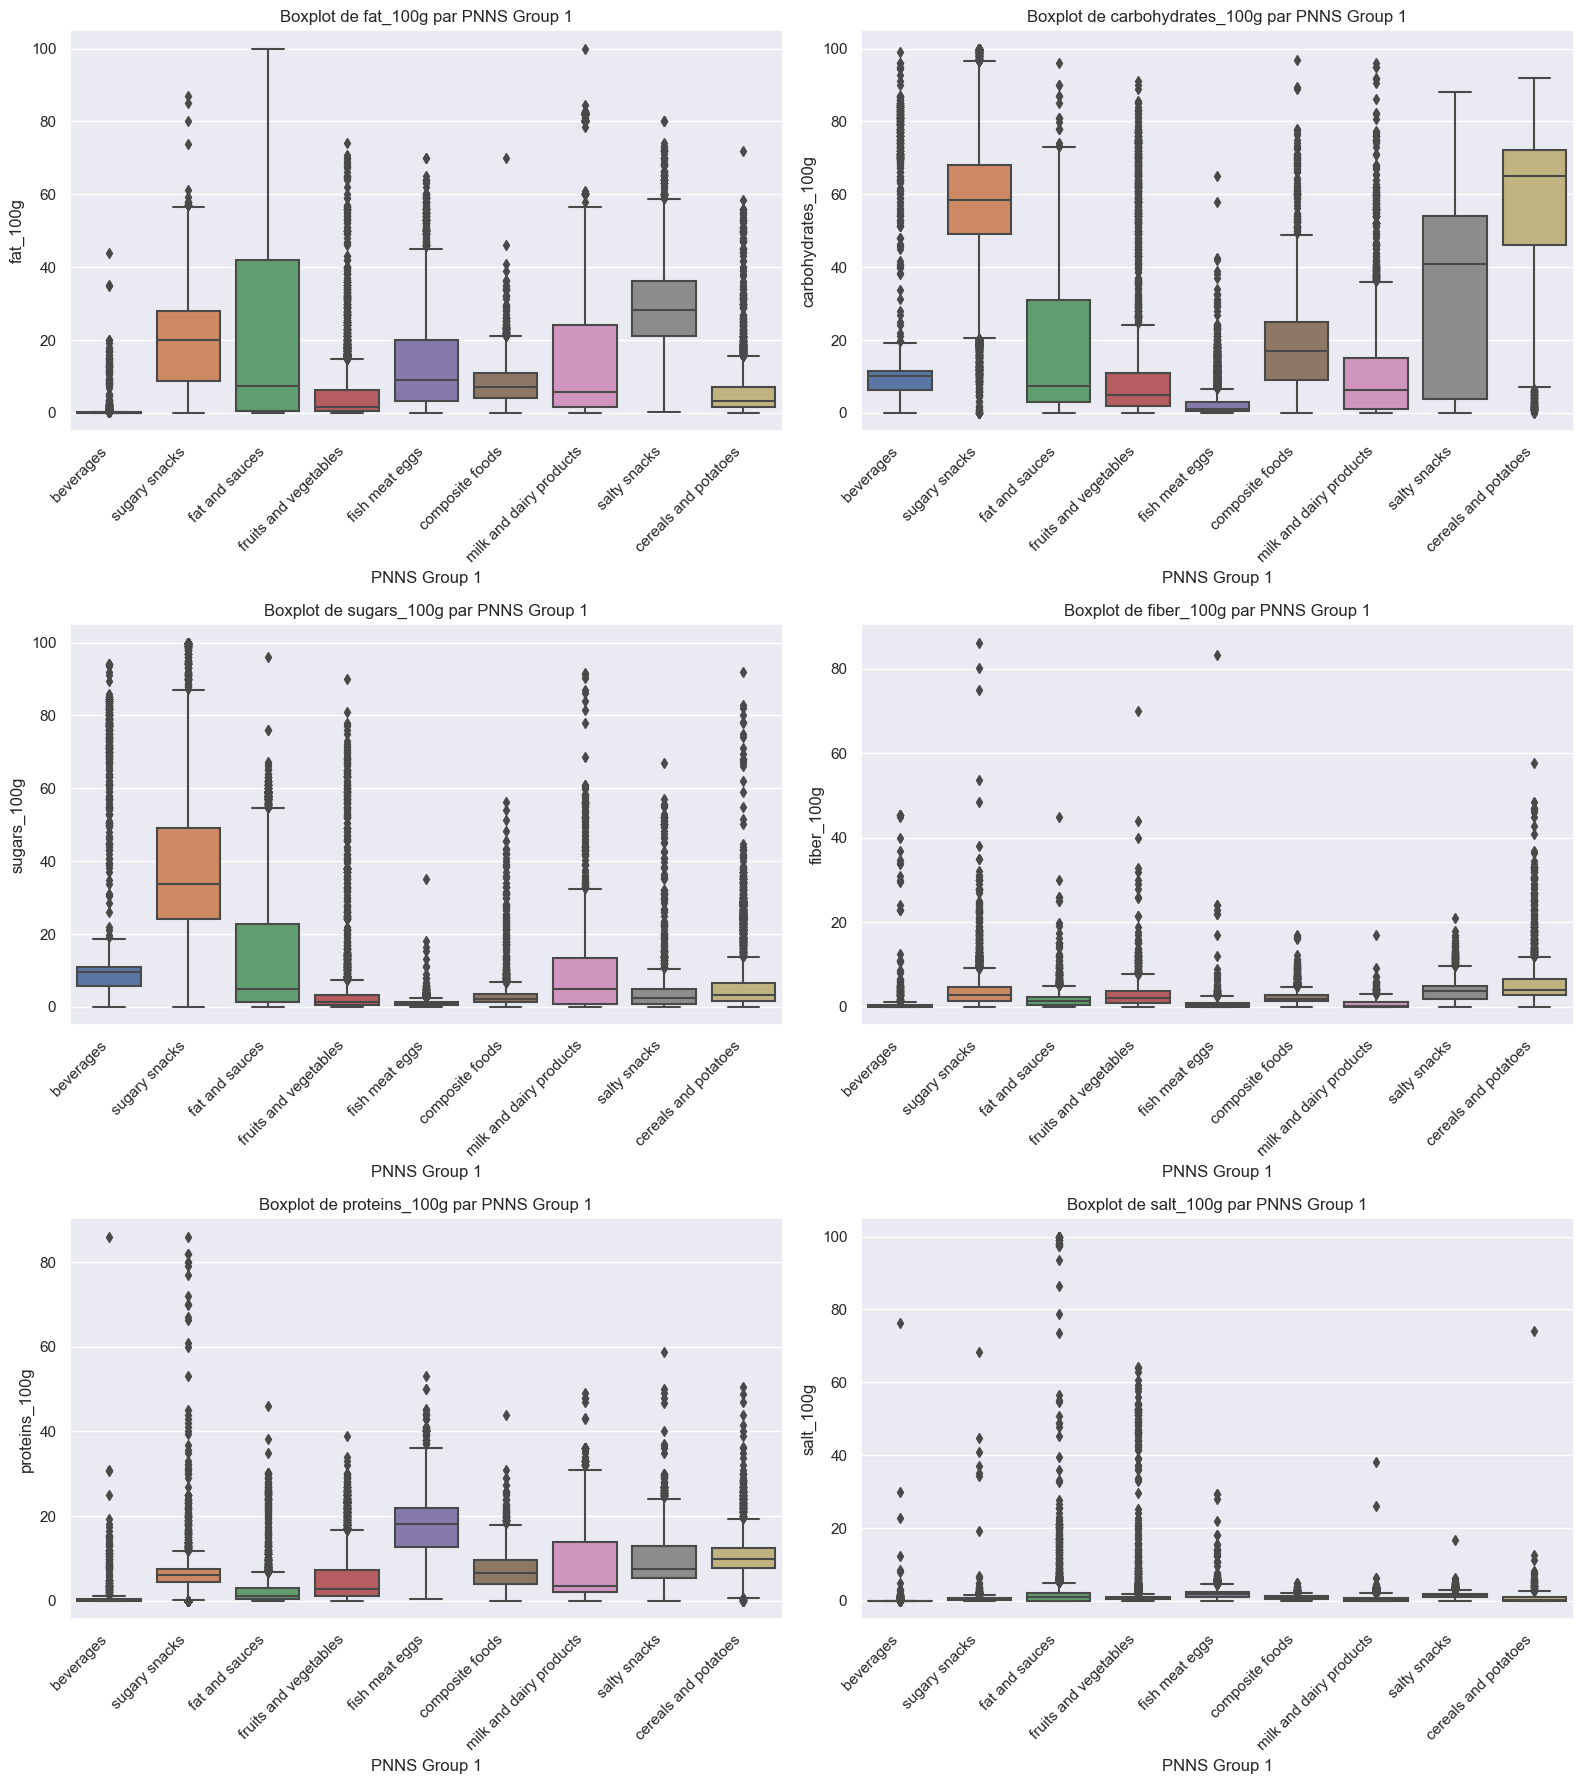

In [5]:
fig, axes = plt.subplots(3, 2, figsize=(16, 18))
axes = axes.flatten()

metrics = ['fat_100g', 'carbohydrates_100g', 'sugars_100g', 
           'fiber_100g', 'proteins_100g', 'salt_100g']

for i, metric in enumerate(metrics):
    sns.boxplot(ax=axes[i], x='pnns_groups_1', y=metric, data=df)
    axes[i].set_title(f"Boxplot de {metric} par PNNS Group 1")
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, horizontalalignment="right")
    axes[i].set_xlabel('PNNS Group 1')
    axes[i].set_ylabel(metric)

plt.tight_layout()
plt.show()

## IQR

Avant d'aller plus loin dans les quantiles, rappelons l'intérêt.

Ce sont des valeurs qui vont diviser les données en intervalles de taille égales. Chaque quantile a son importance et son utilité, surtout pour comprendre et analyser la distribution et la dispersion des données.

In [6]:
# Calcul de l'IQR pour le sucre, la graisse et les protéines

Q1 = df[['sugars_100g', 'fat_100g', 'proteins_100g']].quantile(0.25)
Q3 = df[['sugars_100g', 'fat_100g', 'proteins_100g']].quantile(0.75)
IQR = Q3 - Q1

# On définit les potentiels outliers
outliers = ((
    df[['sugars_100g', 'fat_100g', 'proteins_100g']] < (Q1 - 1.5 * IQR)) |
    (df[['sugars_100g', 'fat_100g', 'proteins_100g']] > (Q3 + 1.5 * IQR)
)).any(axis=1)

# Affichage du nombre de potentiels outliers
outliers_count = outliers.sum()

outliers_count, IQR

(7477,
 sugars_100g     15.000
 fat_100g        19.700
 proteins_100g    8.700
 dtype: float64)

Il y aurait encore potentiellement 7477 outliers. Mais cela peut aussi être des valeurs atypiques selon les aliments, qui contiennent plus ou moins que la normale au niveau de ces valeurs. Comme par exemple le sucre dans les boissons ou les fruits.

Regardons de plus près avec un histogramme.

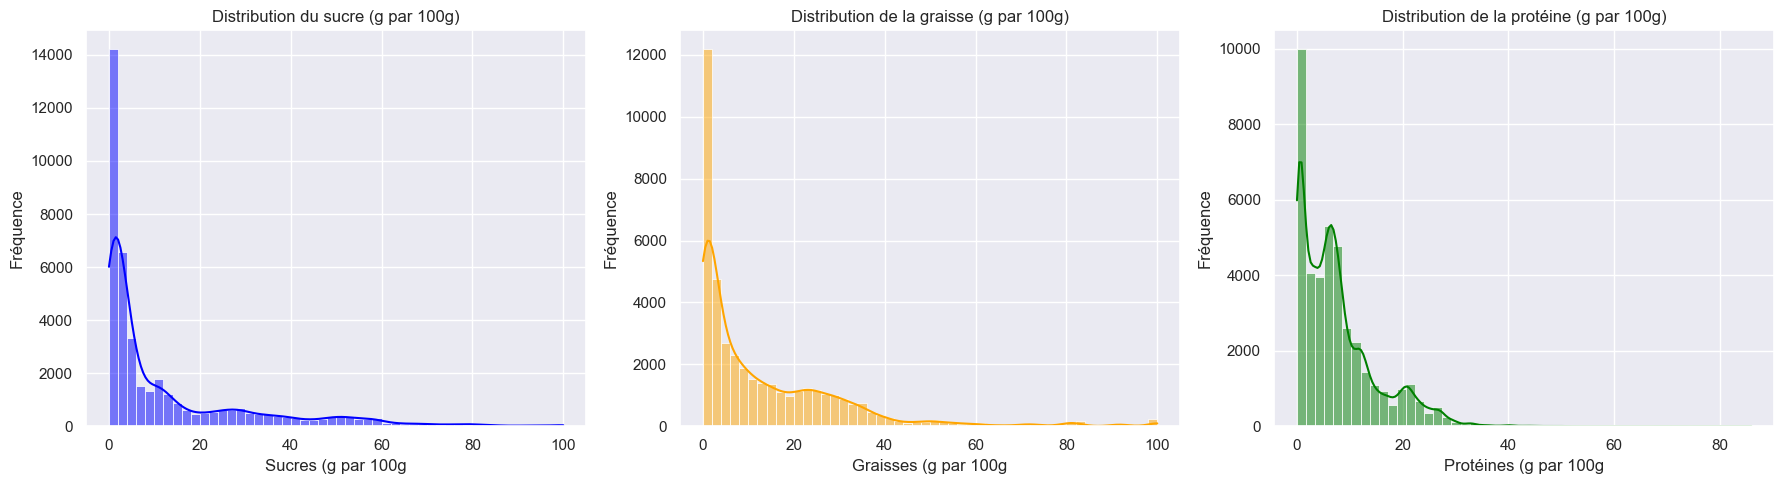

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df['sugars_100g'], bins=50, kde=True, color="blue", ax = axes[0])
axes[0].set_title('Distribution du sucre (g par 100g)')
axes[0].set_xlabel('Sucres (g par 100g')
axes[0].set_ylabel('Fréquence')

sns.histplot(df['fat_100g'], bins=50, kde=True, color="orange", ax = axes[1])
axes[1].set_title('Distribution de la graisse (g par 100g)')
axes[1].set_xlabel('Graisses (g par 100g')
axes[1].set_ylabel('Fréquence')

sns.histplot(df['proteins_100g'], bins=50, kde=True, color="green", ax = axes[2])
axes[2].set_title('Distribution de la protéine (g par 100g)')
axes[2].set_xlabel('Protéines (g par 100g')
axes[2].set_ylabel('Fréquence')

plt.tight_layout()
plt.show()

Ces histogrammes nous montrent des distributions unimodales et asymétriques. Il serait plus approrié d'utiliser une médiane pour la suite, plutôt que la moyenne. Car le problème de la moyenne, c'est que ça sera affecté par, justement, ces valeurs extrêmes.

## Moyenne et médiane

Pour bien comprendre la différence entre les deux, voici un exemple de résultat avec une moyenne et une médiane pour montrer les résultats selon le choix.

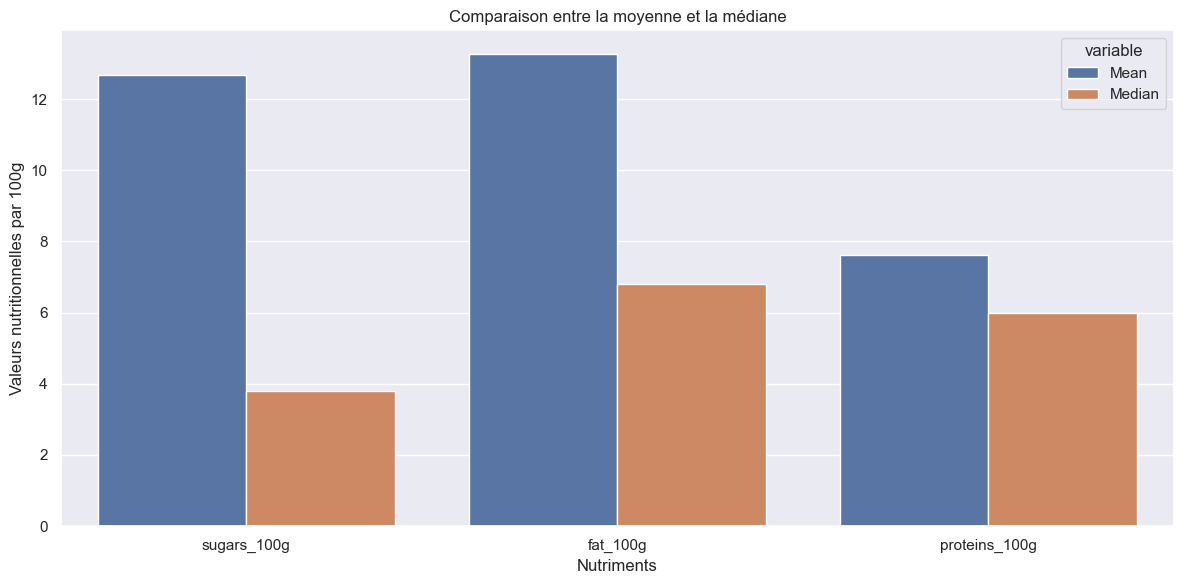

In [8]:
df_mean_values = df[['sugars_100g', 'fat_100g', 'proteins_100g']].mean()
df_median_values = df[['sugars_100g', 'fat_100g', 'proteins_100g']].median()

df_mean_median_values = pd.DataFrame({
    'Mean': df_mean_values,
    'Median': df_median_values
})

df_mean_median_values_melted = df_mean_median_values.reset_index().melt(
    id_vars="index",
    value_vars=['Mean', 'Median']
)

plt.figure(figsize=(12,6))
ax = sns.barplot(data=df_mean_median_values_melted, x="index", y="value", hue="variable")
ax.set_title("Comparaison entre la moyenne et la médiane")
ax.set_xlabel('Nutriments')
ax.set_ylabel('Valeurs nutritionnelles par 100g')

plt.tight_layout()
plt.show()

On s'aperçoit que la médiane est toujours plus basse que la moyenne, ça montre l'impact d'utiliser la moyenne dans des distributions asymétriques. Voilà pourquoi il est conseillé de plutôt calculer avec une médiane dans ce type de distributions.

# Analyses bi-variée et multivariée

### Pairplot

In [9]:
df.describe()

,code,additives_n,nutrition-score-fr_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,calcium_100g,alcohol_100g
count,41234.000,41234.000,40811.000,41217.000,41234.000,41234.000,41234.000,41234.000,25761.000,41172.000,41234.000,41234.000,1854.000,36400.000
mean,3788026482652.704,2.043,8.451,1101.327,13.267,5.303,27.585,12.691,2.744,7.607,1.058,0.418,0.335,0.006
std,5582387575451.542,2.559,9.057,776.395,16.757,8.029,27.226,18.229,3.748,7.256,3.498,1.436,1.840,0.218
min,10.000,0.000,-15.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,3228024052677.750,0.000,1.000,418.000,1.300,0.300,4.000,1.000,0.500,2.000,0.080,0.032,0.120,0.000
50%,3276170010820.500,1.000,8.000,1015.000,6.800,2.000,14.300,3.800,1.800,6.000,0.600,0.236,0.138,0.000
75%,3596710338713.000,3.000,15.000,1644.000,21.000,7.400,53.000,16.000,3.500,10.700,1.250,0.492,0.360,0.000
max,366111205177802.000,31.000,40.000,15481.000,100.000,100.000,100.000,100.000,86.200,86.000,100.000,83.000,69.500,20.000


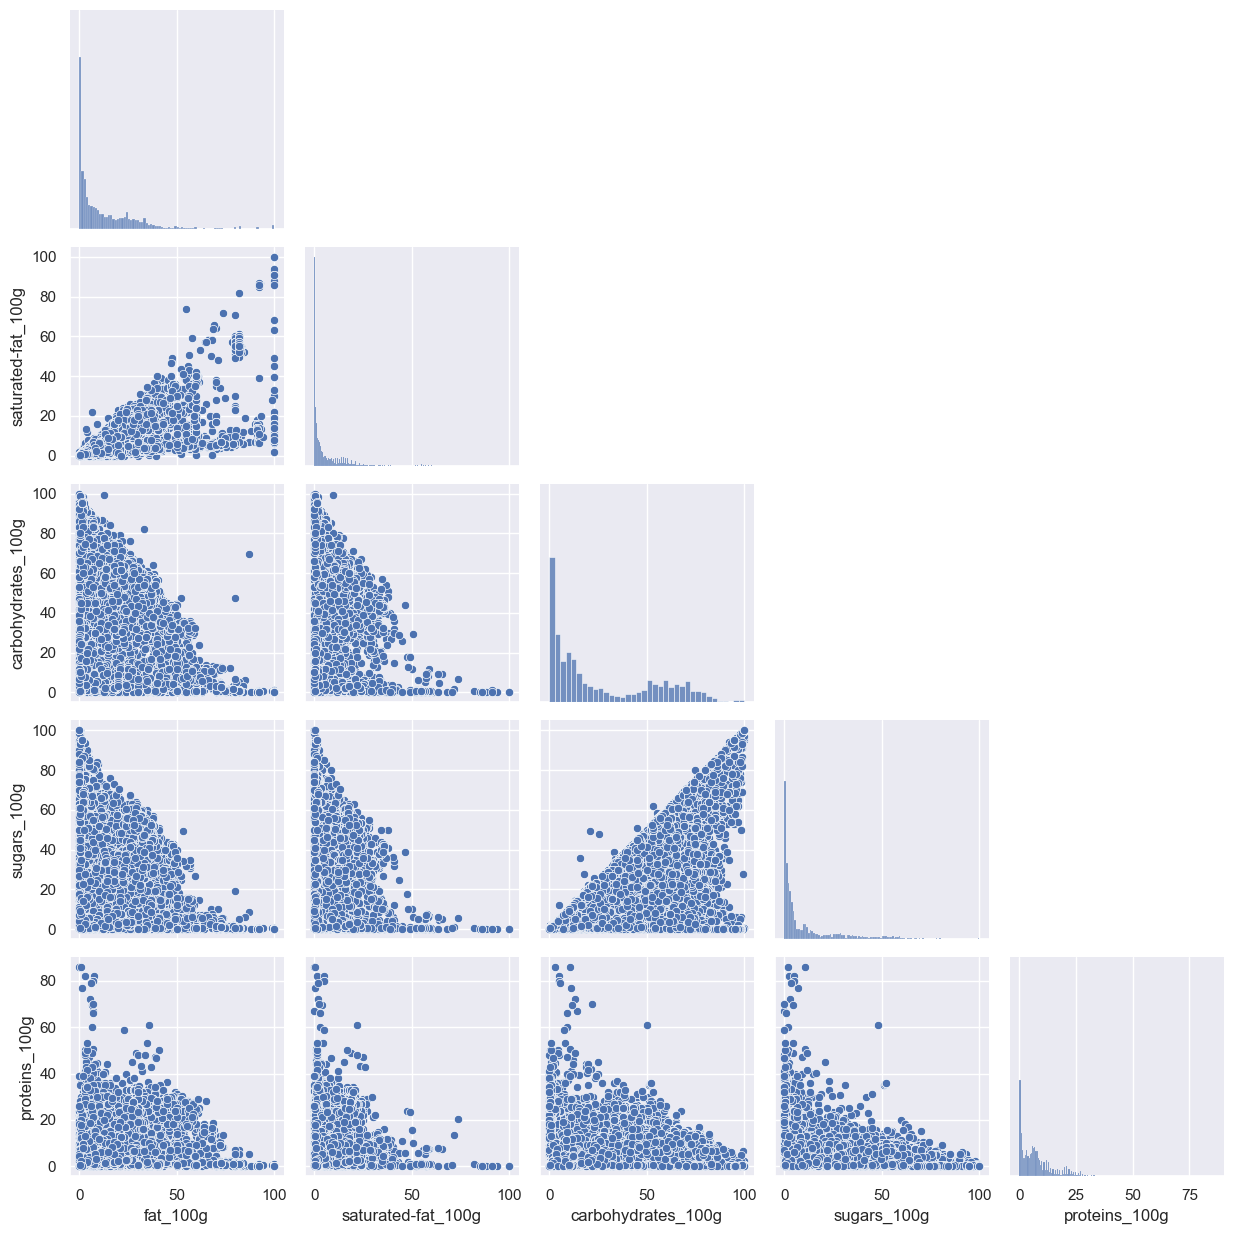

In [10]:
pairplot_vars = df[['fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'proteins_100g']]

sns.pairplot(pairplot_vars, corner=True)
plt.tight_layout()
plt.show()

Les premières observations que l'on peut en tirer, c'est que :

- Si on prend en compte chaque distribution, elles sont toutes plus ou moins asymétrique vers la droite. Ce qui indique que la majorité des valeurs sont basses et quelques valeurs extrêmes.

Pour les relations entre les variables :

- "fat_100g" et "saturated-fat_100g" ont une corrélation positive assez forte, cela indique que les produits avec des teneurs élevées en graisses, ont souvent des teneurs élevées en graisses saturées.
- On retrouve un résultat similaire et même plus prononcé pour "sugars_100g" et "carbohydrates_100g"

### Boxplot

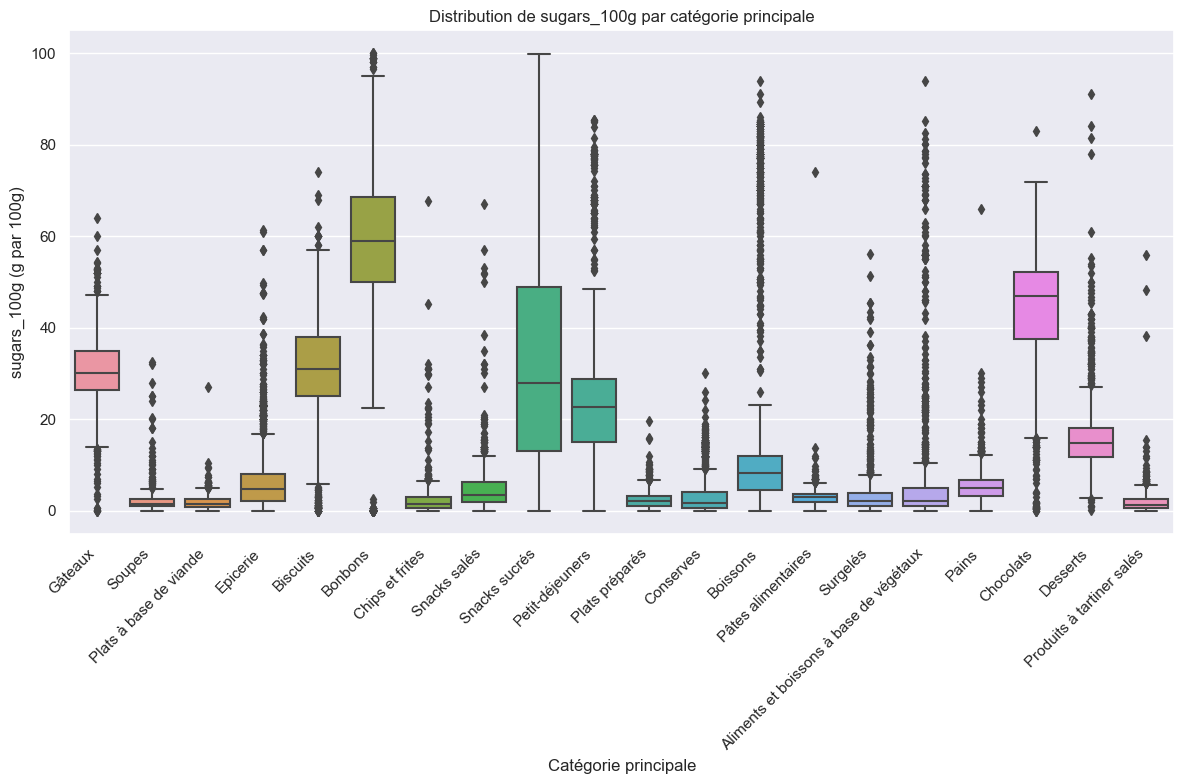

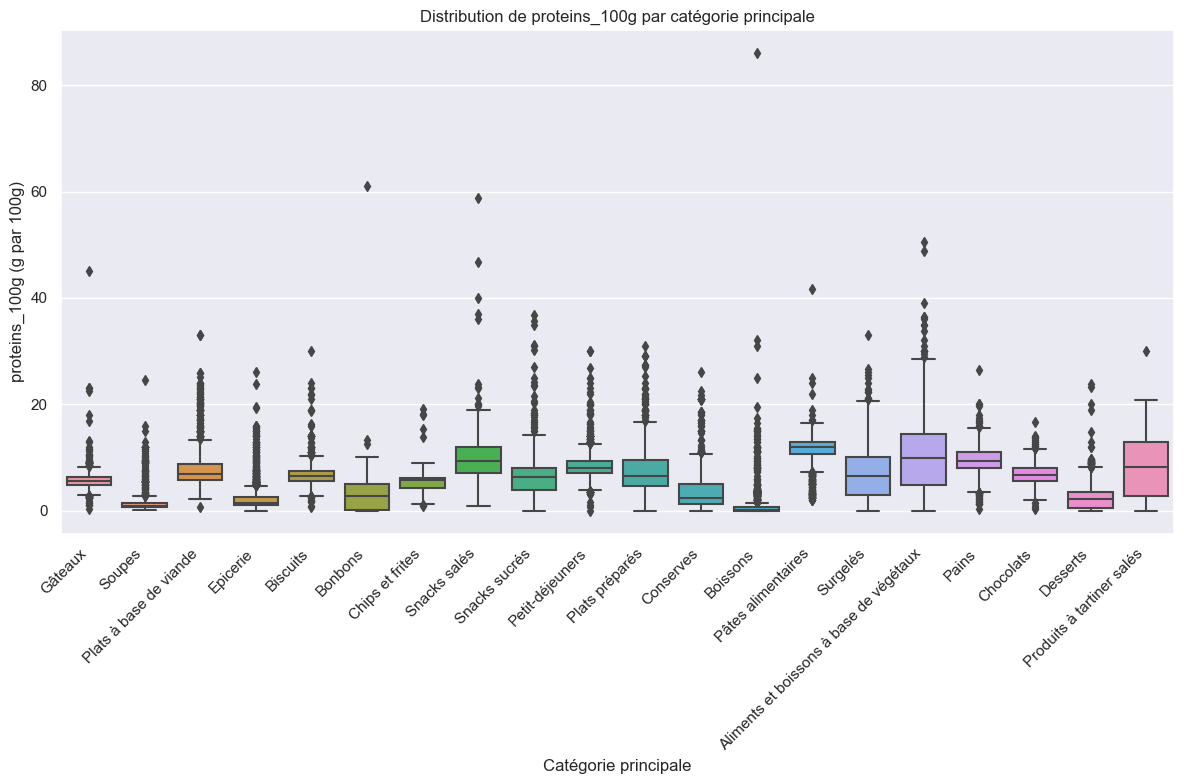

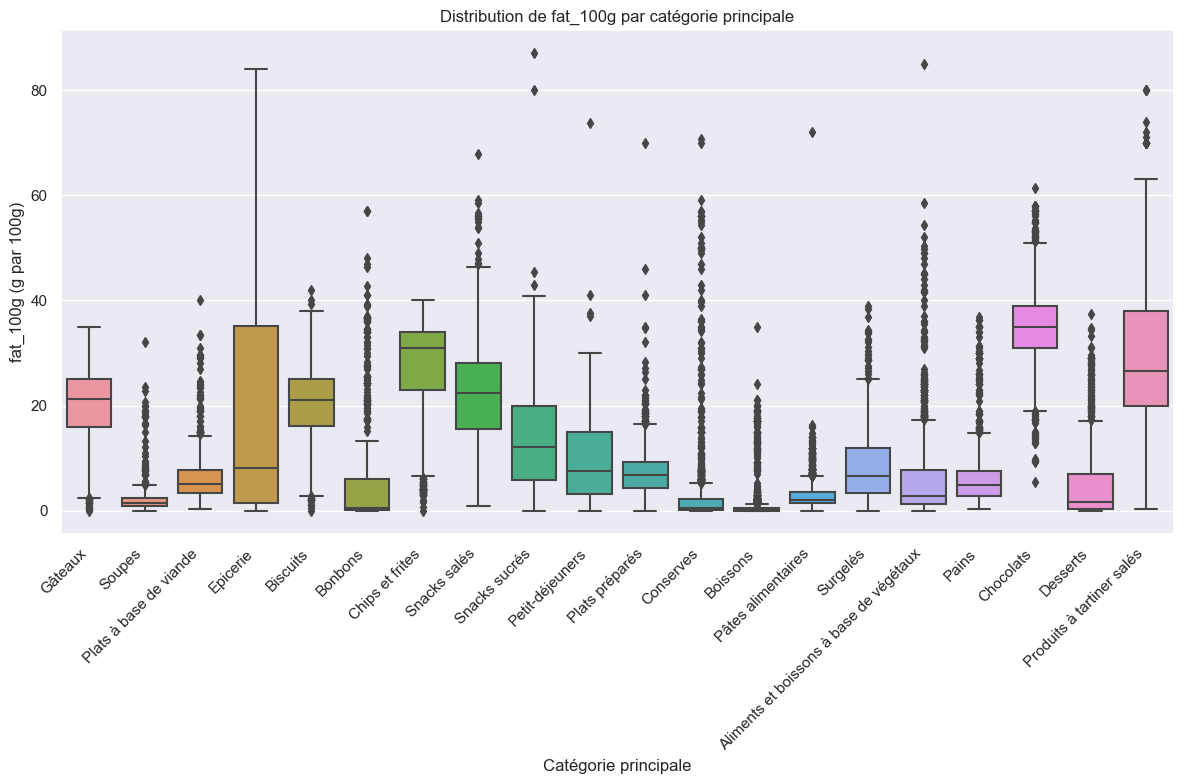

In [11]:
# Filtrer pour garder les 20 catégories les plus représentés dans le df pour notre boxplot
nutrients = ['sugars_100g', 'proteins_100g', 'fat_100g']
top_categories = df['main_category_fr'].value_counts().nlargest(20).index
df_filtered_top_categories = df[df['main_category_fr'].isin(top_categories)]

for nutrient in nutrients:
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=df_filtered_top_categories, x="main_category_fr", y=nutrient)
    plt.title(f'Distribution de {nutrient} par catégorie principale')
    plt.xlabel('Catégorie principale')
    plt.ylabel(f'{nutrient} (g par 100g)')
    plt.xticks(rotation=45, horizontalalignment="right")
    plt.tight_layout()
    plt.show()

### Heatmap

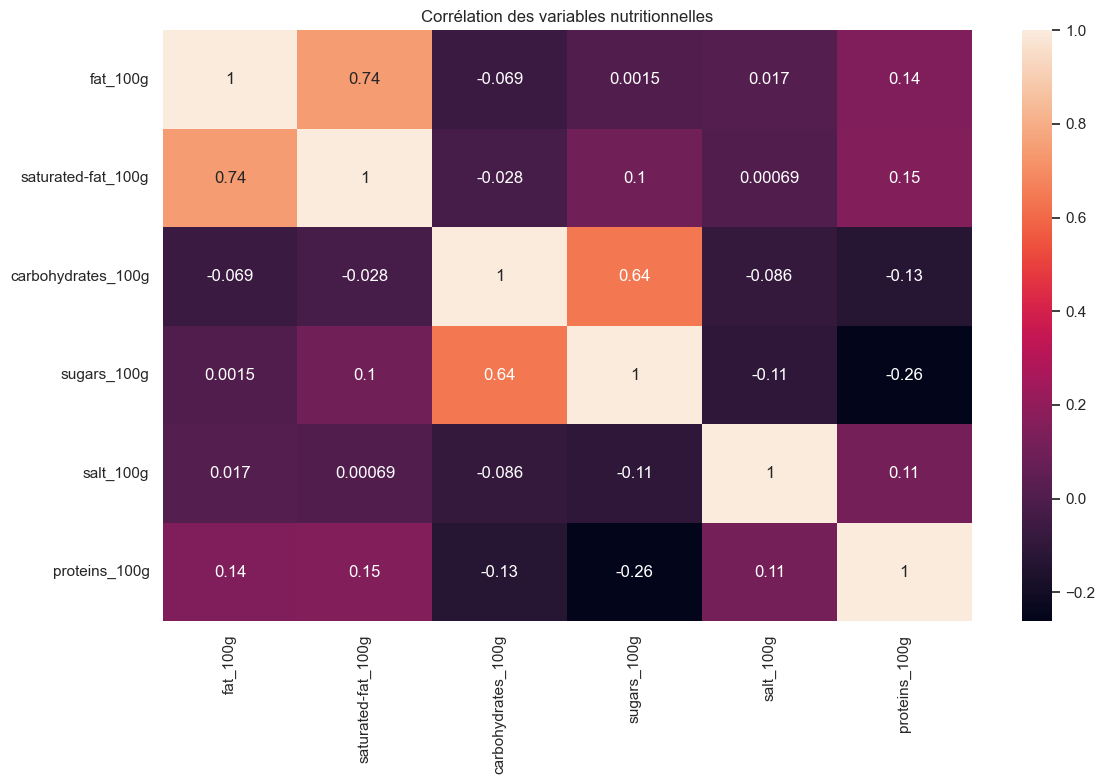

In [12]:
corr_data = df[['fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'salt_100g', 'proteins_100g']]
corr_matrix = corr_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True)
plt.title('Corrélation des variables nutritionnelles')
plt.tight_layout()
plt.show()

# ACP

In [13]:
df.head()

,code,states_fr,countries_fr,categories_tags,categories_fr,main_category_fr,product_name,quantity,packaging_tags,additives,additives_tags,additives_n,nutrition_grade_fr,nutrition-score-fr_100g,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,calcium_100g,alcohol_100g
0,40608754,"A vérifier,Complet,Informations nutritionnelle...",FRANCE,"beverages,carbonated drinks,sodas,colas,sugare...","Boissons,Boissons gazeuses,Sodas,Sodas au cola...",Sodas,"pepsi, nouveau goût !",15 cl,canette-aluminium,[ eau-gazeifiee -> fr:eau-gazeifiee ] [ eau...,"en:e150d,en:e338",2.000,e,13.000,beverages,sweetened beverages,177.000,0.000,0.000,10.400,10.400,0.000,0.000,0.025,0.010,NaN,0.000
1,87177756,"A vérifier,Complet,Informations nutritionnelle...",FRANCE,"beverages,plant based beverages,carbonated dri...","Aliments et boissons à base de végétaux,Boisso...",Sodas aux fruits,7up,33 cl,canette,[ eau-gazeifiee -> fr:eau-gazeifiee ] [ eau...,"en:e330,en:e296,en:e331",3.000,e,13.000,beverages,sweetened beverages,177.000,0.000,0.000,10.400,10.400,NaN,0.000,0.100,0.039,NaN,0.000
2,10,"A vérifier,Complet,Informations nutritionnelle...",FRANCE,"sugary snacks,biscuits and cakes,desserts,cake...","Snacks sucrés,Biscuits et gâteaux,Desserts,Gât...",Gâteaux,madeleines nature,880 g,"carton,plastique",[ farine-de-ble -> fr:farine-de-ble ] [ far...,"en:e422,en:e503,en:e500,en:e450,en:e471",5.000,d,12.000,sugary snacks,biscuits and cakes,1900.000,23.000,2.500,55.000,26.000,1.500,6.000,0.660,0.260,NaN,0.000
3,30,"A vérifier,Complet,Informations nutritionnelle...",FRANCE,"sugary snacks,biscuits and cakes,desserts,cake...","Snacks sucrés,Biscuits et gâteaux,Desserts,Gât...",Gâteaux,cakes raisins,900 g,"boite,carton,plastique,sachet",[ farine-de-ble -> fr:farine-de-ble ] [ far...,"en:e422,en:e503,en:e500,en:e450,en:e471",5.000,d,13.000,sugary snacks,biscuits and cakes,1768.000,19.000,2.500,56.000,28.000,1.800,5.800,0.650,0.256,NaN,0.000
4,31,"A vérifier,Complet,Informations nutritionnelle...",FRANCE,"sugary snacks,biscuits and cakes,desserts,cake...","Snacks sucrés,Biscuits et gâteaux,Desserts,Gât...",Pâtisseries,cakes aux fruits,600 g,"boite,carton,sachet,plastique",[ fruits-37-4 -> fr:fruits-37-4 ] [ fruits-...,"en:e202,en:e220,en:e150a,en:e120,en:e133,en:e3...",11.000,d,12.000,sugary snacks,biscuits and cakes,1670.000,15.000,2.000,60.000,34.000,1.500,4.900,0.600,0.236,NaN,0.000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41234 entries, 0 to 41233
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   code                     41234 non-null  int64  
 1   states_fr                41234 non-null  object 
 2   countries_fr             41234 non-null  object 
 3   categories_tags          41234 non-null  object 
 4   categories_fr            41234 non-null  object 
 5   main_category_fr         41234 non-null  object 
 6   product_name             41141 non-null  object 
 7   quantity                 40430 non-null  object 
 8   packaging_tags           39650 non-null  object 
 9   additives                38489 non-null  object 
 10  additives_tags           38121 non-null  object 
 11  additives_n              41234 non-null  float64
 12  nutrition_grade_fr       40811 non-null  object 
 13  nutrition-score-fr_100g  40811 non-null  float64
 14  pnns_groups_1         

## Transformation des données

In [15]:
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(df['nutrition_grade_fr'])

LabelEncoder()

In [16]:
df['nutrition_label'] = label_encoder.transform(df['nutrition_grade_fr'])

In [17]:
df_pca = df[['additives_n', 'nutrition_label', 'nutrition-score-fr_100g', 'energy_100g', 'fat_100g', 'fiber_100g',
        'carbohydrates_100g', 'sugars_100g', 'proteins_100g']]

df_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41234 entries, 0 to 41233
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   additives_n              41234 non-null  float64
 1   nutrition_label          41234 non-null  int32  
 2   nutrition-score-fr_100g  40811 non-null  float64
 3   energy_100g              41217 non-null  float64
 4   fat_100g                 41234 non-null  float64
 5   fiber_100g               25761 non-null  float64
 6   carbohydrates_100g       41234 non-null  float64
 7   sugars_100g              41234 non-null  float64
 8   proteins_100g            41172 non-null  float64
dtypes: float64(8), int32(1)
memory usage: 2.7 MB


In [18]:
# On impute les quelques valeurs manquantes par la médiane (car distribution asymétrique, et par la droite)
imputer = SimpleImputer(strategy="median")
df_pca_imputed = imputer.fit_transform(df_pca)

In [19]:
df_pca_imputed = pd.DataFrame(df_pca_imputed, columns=df_pca.columns)
df_pca_imputed

,additives_n,nutrition_label,nutrition-score-fr_100g,energy_100g,fat_100g,fiber_100g,carbohydrates_100g,sugars_100g,proteins_100g
0,2.000,4.000,13.000,177.000,0.000,0.000,10.400,10.400,0.000
1,3.000,4.000,13.000,177.000,0.000,1.800,10.400,10.400,0.000
2,5.000,3.000,12.000,1900.000,23.000,1.500,55.000,26.000,6.000
3,5.000,3.000,13.000,1768.000,19.000,1.800,56.000,28.000,5.800
4,11.000,3.000,12.000,1670.000,15.000,1.500,60.000,34.000,4.900
...,...,...,...,...,...,...,...,...,...
41229,0.000,2.000,4.000,192.000,0.500,0.600,10.200,9.200,0.600
41230,4.000,2.000,4.000,1017.000,1.300,0.005,95.870,0.120,0.040
41231,5.000,1.000,2.000,1031.000,1.300,1.470,95.310,0.100,0.004
41232,0.000,0.000,-4.000,1643.000,2.800,5.900,74.800,2.600,13.000


In [20]:
X = df_pca_imputed
names = df_pca_imputed.index
features = df_pca_imputed.columns

In [21]:
scaler = StandardScaler()

scaler.fit(X)

X_scaled = scaler.transform(X)
X_scaled

array([[-0.01680302,  1.30541948,  0.50540685, ..., -0.63121874,
        -0.12568789, -1.04872192],
       [ 0.37397847,  1.30541948,  0.50540685, ..., -0.63121874,
        -0.12568789, -1.04872192],
       [ 1.15554144,  0.58385931,  0.39441852, ...,  1.00692746,
         0.73012059, -0.22123435],
       ...,
       [ 1.15554144, -0.85926102, -0.7154648 , ...,  2.4875031 ,
        -0.69074093, -1.04817026],
       [-0.79836598, -1.58082118, -1.38139479, ...,  1.73417622,
        -0.55359213,  0.74416781],
       [-0.79836598, -0.13770085, -0.7154648 , ..., -0.99484312,
        -0.66879712, -0.97976462]])

In [22]:
n_components = 9

pca = PCA(n_components=n_components)

pca.fit(X_scaled)

PCA(n_components=9)

In [23]:
pca.explained_variance_ratio_

array([0.36981066, 0.18736759, 0.15748499, 0.10051906, 0.08264467,
       0.06354768, 0.03028139, 0.0064934 , 0.00185056])

In [24]:
scree = (pca.explained_variance_ratio_ * 100).round(2)
scree

array([36.98, 18.74, 15.75, 10.05,  8.26,  6.35,  3.03,  0.65,  0.19])

In [25]:
x_list = range(1, n_components + 1)
list(x_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9]

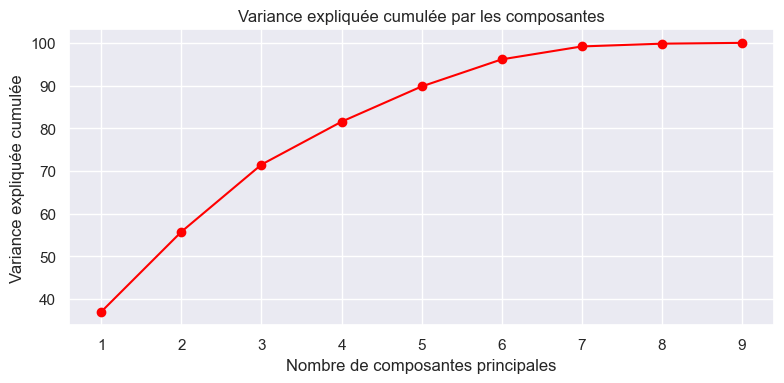

In [26]:
# On affiche la variance expliquée cumulée
plt.figure(figsize=(8, 4))
plt.plot(x_list, scree.cumsum(), c="red", marker="o")
plt.title("Variance expliquée cumulée par les composantes")
plt.xlabel("Nombre de composantes principales")
plt.ylabel("Variance expliquée cumulée")
plt.grid(True)

plt.tight_layout()
plt.show()

Le graphique ci-dessus monntre une variance expliquée cumulée par les composantes. Généralement, on choisit le nombre de composantes principales de manière à retenir une grande partie de la variance (souvent autour de 70 %). Si on regarde bien, on voit qu'à partir de 3 ou 4 composantes principales semble approprié.

## Components 

In [27]:
pcs = pca.components_
pcs

array([[ 1.28036094e-01,  4.52372634e-01,  4.95956127e-01,
         4.66105422e-01,  3.65261254e-01,  3.64959118e-02,
         2.72569881e-01,  3.24492945e-01,  3.74335190e-02],
       [ 1.96035188e-01, -1.01787410e-01, -9.99599786e-02,
        -1.24419169e-01, -4.41280656e-01,  5.58407788e-02,
         5.12138761e-01,  5.08755281e-01, -4.54722492e-01],
       [-3.32438513e-01, -2.95308365e-01, -2.27084287e-01,
         3.07130168e-01,  5.79914459e-02,  6.83153380e-01,
         3.25506219e-01,  5.32807231e-04,  2.83487672e-01],
       [ 8.24664842e-01, -1.19800103e-02, -7.92481737e-03,
        -4.88954034e-02, -1.78825968e-01,  2.17218875e-01,
         4.23717722e-02, -1.38823164e-01,  4.65940779e-01],
       [-3.68453923e-01,  1.88474535e-01,  1.61276747e-01,
        -1.81909467e-01, -4.51343985e-01, -2.59757287e-01,
         1.39565834e-01,  2.42696748e-01,  6.48114371e-01],
       [-9.64411139e-02,  4.13111652e-01,  2.42240136e-01,
        -3.77694296e-01, -1.73460873e-01,  6.421718

In [28]:
pcs = pd.DataFrame(pcs)
pcs

,0,1,2,3,4,5,6,7,8
0,0.128,0.452,0.496,0.466,0.365,0.036,0.273,0.324,0.037
1,0.196,-0.102,-0.100,-0.124,-0.441,0.056,0.512,0.509,-0.455
2,-0.332,-0.295,-0.227,0.307,0.058,0.683,0.326,0.001,0.283
3,0.825,-0.012,-0.008,-0.049,-0.179,0.217,0.042,-0.139,0.466
4,-0.368,0.188,0.161,-0.182,-0.451,-0.260,0.140,0.243,0.648
5,-0.096,0.413,0.242,-0.378,-0.173,0.642,-0.378,0.093,-0.158
6,-0.094,0.341,0.117,0.030,-0.266,0.004,0.468,-0.732,-0.184
7,0.025,0.612,-0.771,0.081,0.082,-0.039,-0.011,0.113,0.052
8,0.006,-0.005,0.008,0.698,-0.570,-0.016,-0.418,-0.004,-0.113


In [29]:
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs

,additives_n,nutrition_label,nutrition-score-fr_100g,energy_100g,fat_100g,fiber_100g,carbohydrates_100g,sugars_100g,proteins_100g
F1,0.128,0.452,0.496,0.466,0.365,0.036,0.273,0.324,0.037
F2,0.196,-0.102,-0.100,-0.124,-0.441,0.056,0.512,0.509,-0.455
F3,-0.332,-0.295,-0.227,0.307,0.058,0.683,0.326,0.001,0.283
F4,0.825,-0.012,-0.008,-0.049,-0.179,0.217,0.042,-0.139,0.466
F5,-0.368,0.188,0.161,-0.182,-0.451,-0.260,0.140,0.243,0.648
F6,-0.096,0.413,0.242,-0.378,-0.173,0.642,-0.378,0.093,-0.158
F7,-0.094,0.341,0.117,0.030,-0.266,0.004,0.468,-0.732,-0.184
F8,0.025,0.612,-0.771,0.081,0.082,-0.039,-0.011,0.113,0.052
F9,0.006,-0.005,0.008,0.698,-0.570,-0.016,-0.418,-0.004,-0.113


## Cercles de corrélation

In [30]:
def correlation_graph(pca, x_y, features):
    """
    Arguments :
    -----
    pca = sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y = list ou tuple : le couple x,y des plans à afficher, exemple : [0,1] pour F1, F2
    features = list ou tuple : la liste des features (ie des dimensions) à représenter
    """
    
    # Extraits x et y
    x,y = x_y
    
    # Taille du graph
    fig, ax = plt.subplots(figsize=(10, 9))
    
    # Pour chaque componente
    for i in range(0, pca.components_.shape[1]):
        
        # Les flèches
        ax.arrow(
            0,0,
            pca.components_[x, i],
            pca.components_[y, i],
            head_width=0.07,
            head_length=0.07,
            width=0.02,
        )
        
        # Les labels
        plt.text(
            pca.components_[x, i] + 0.05,
            pca.components_[y, i] + 0.05,
            features[i]
        )
        
    # Affichage des lignes horizonzales et verticales
    plt.plot([-1, 1], [0,0], color="grey", ls="--")
    plt.plot([0,0], [-1, 1], color="grey", ls="--")
        
    # Nom des axes, avec pourcentage d'inertie expliqué
    plt.xlabel('f{} ({})%'.format(x+1, round(100*pca.explained_variance_ratio_[x], 1)))
    plt.ylabel('f{} ({})%'.format(y+1, round(100*pca.explained_variance_ratio_[y], 1)))

    # Titre du graph
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))

    # Affichage
    plt.axis('equal')
    plt.show(block=False)

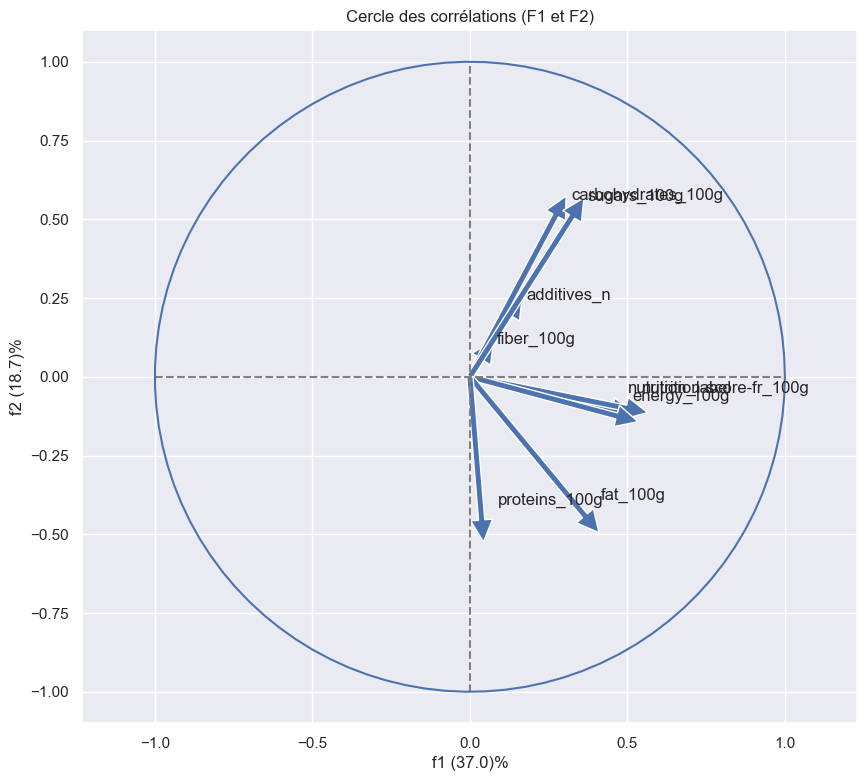

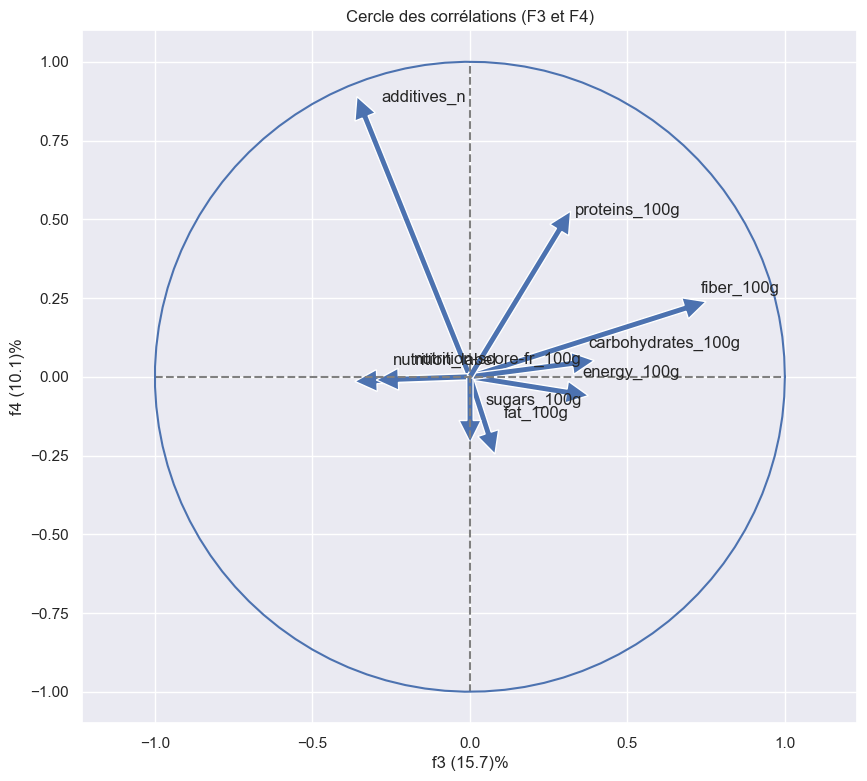

In [31]:
correlation_graph(pca, (0,1), features)
correlation_graph(pca, (2,3), features)

Conclusion de ces cercles de corrélations :

F1 et F2 :
- "carbohydrates" et "sugars" montrent des corrélations très fortes et positives sur F1. Cela suggère que cette composante est fortement influencée par les nutriments en glucides et en sucre. Cela est assez logique, dû au fait que les sucres sont une sous-catégorie des glucides.

F3 et F4 : 
- "fiber" et "proteins" ont de fortes contributions positives sur F3. Cette composantes principale est donc fortement influencée par les fibres et les protéines.


## Projection des individus

In [44]:
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels=None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8],
                                colors=None,
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = clusters if clusters is not None else None

    hue_order =['a', 'b', 'c', 'd', 'e']

    custom_palette_dict = {
        'a': "#499A53",
        'b': "#74D834",
        'c': "#FBF605",
        'd': "#F49402",
        'e': "#FF0000"
    }
        
    # Les points    
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c, hue_order=hue_order, palette=custom_palette_dict if c is not None else "deep", s=100)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}', fontsize=18)
    ax.set_ylabel(f'F{y+1} {v2}', fontsize=18)

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='16', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})", fontsize=20)
    plt.legend(fontsize='18', title_fontsize='14')
    plt.show()

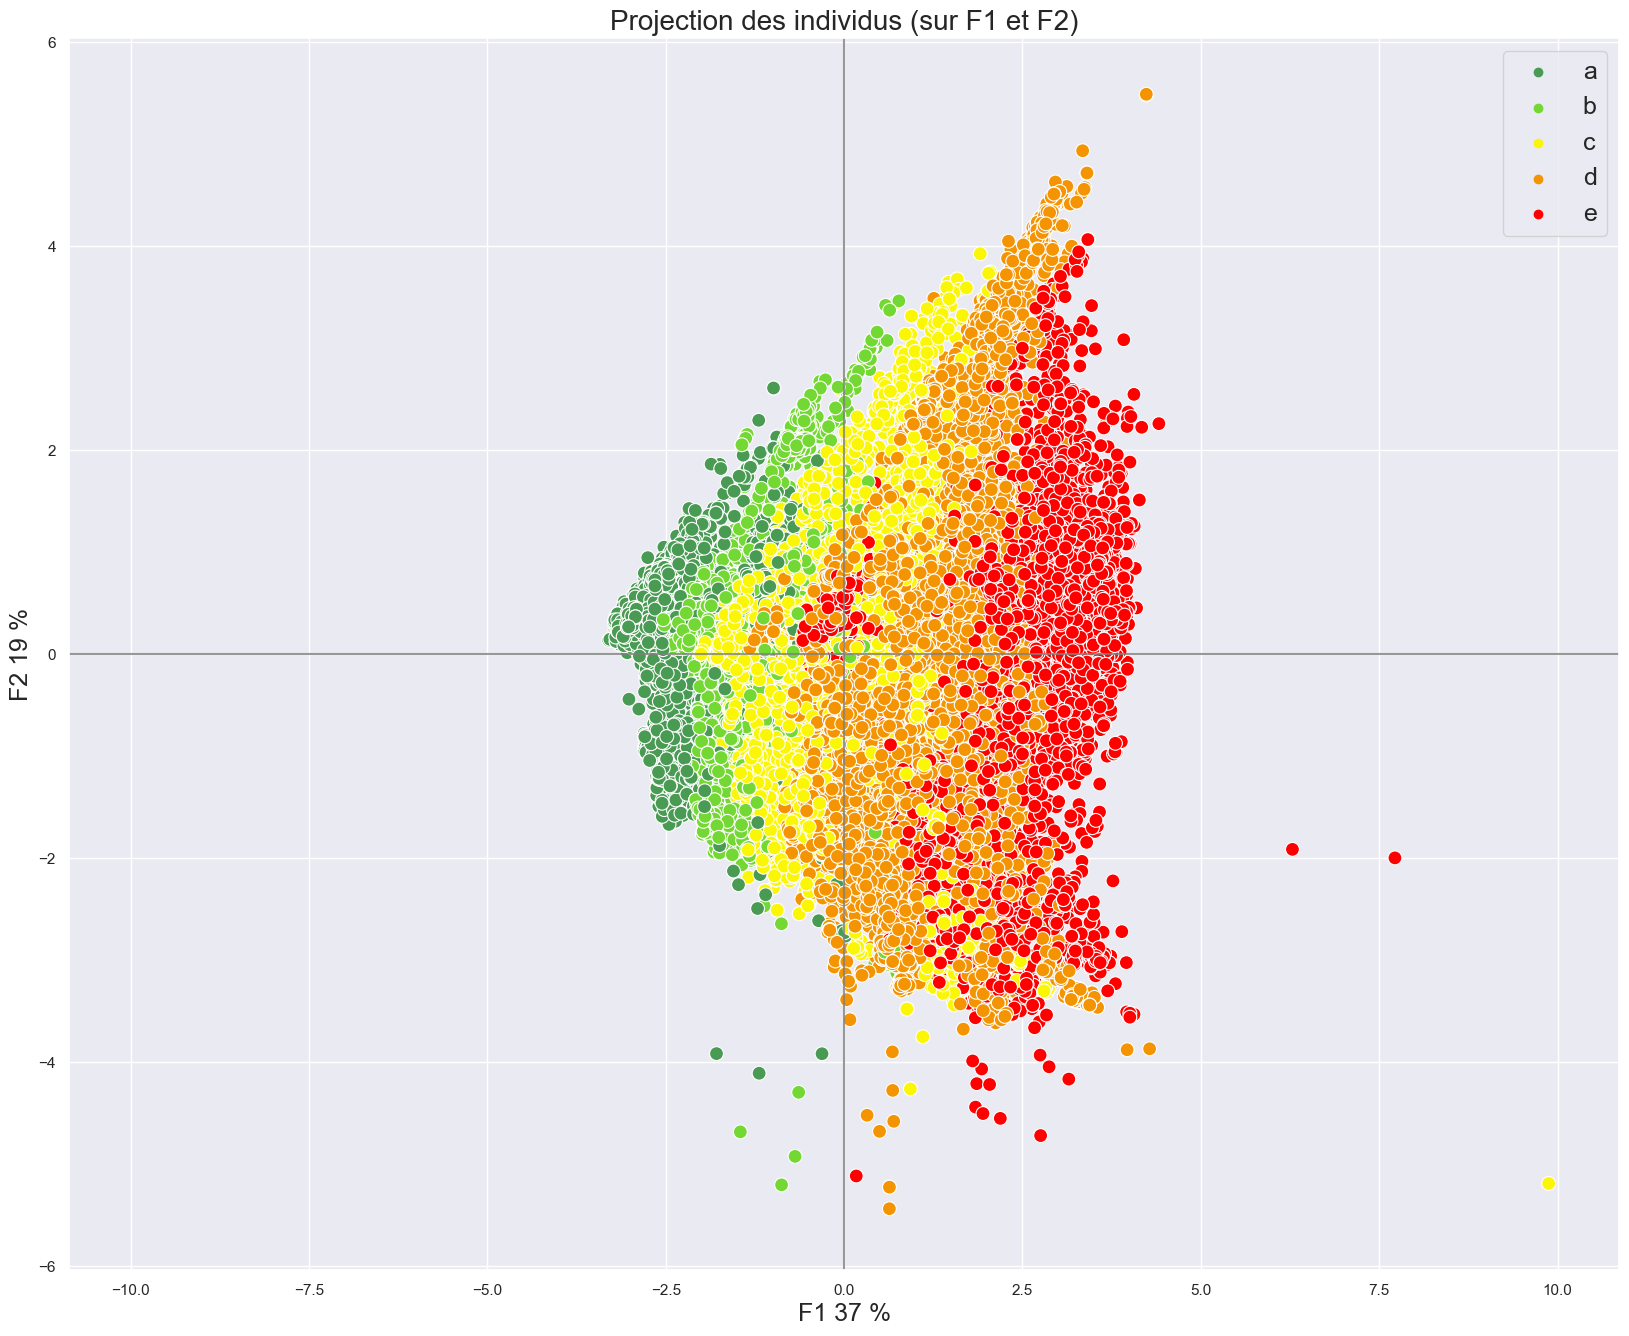

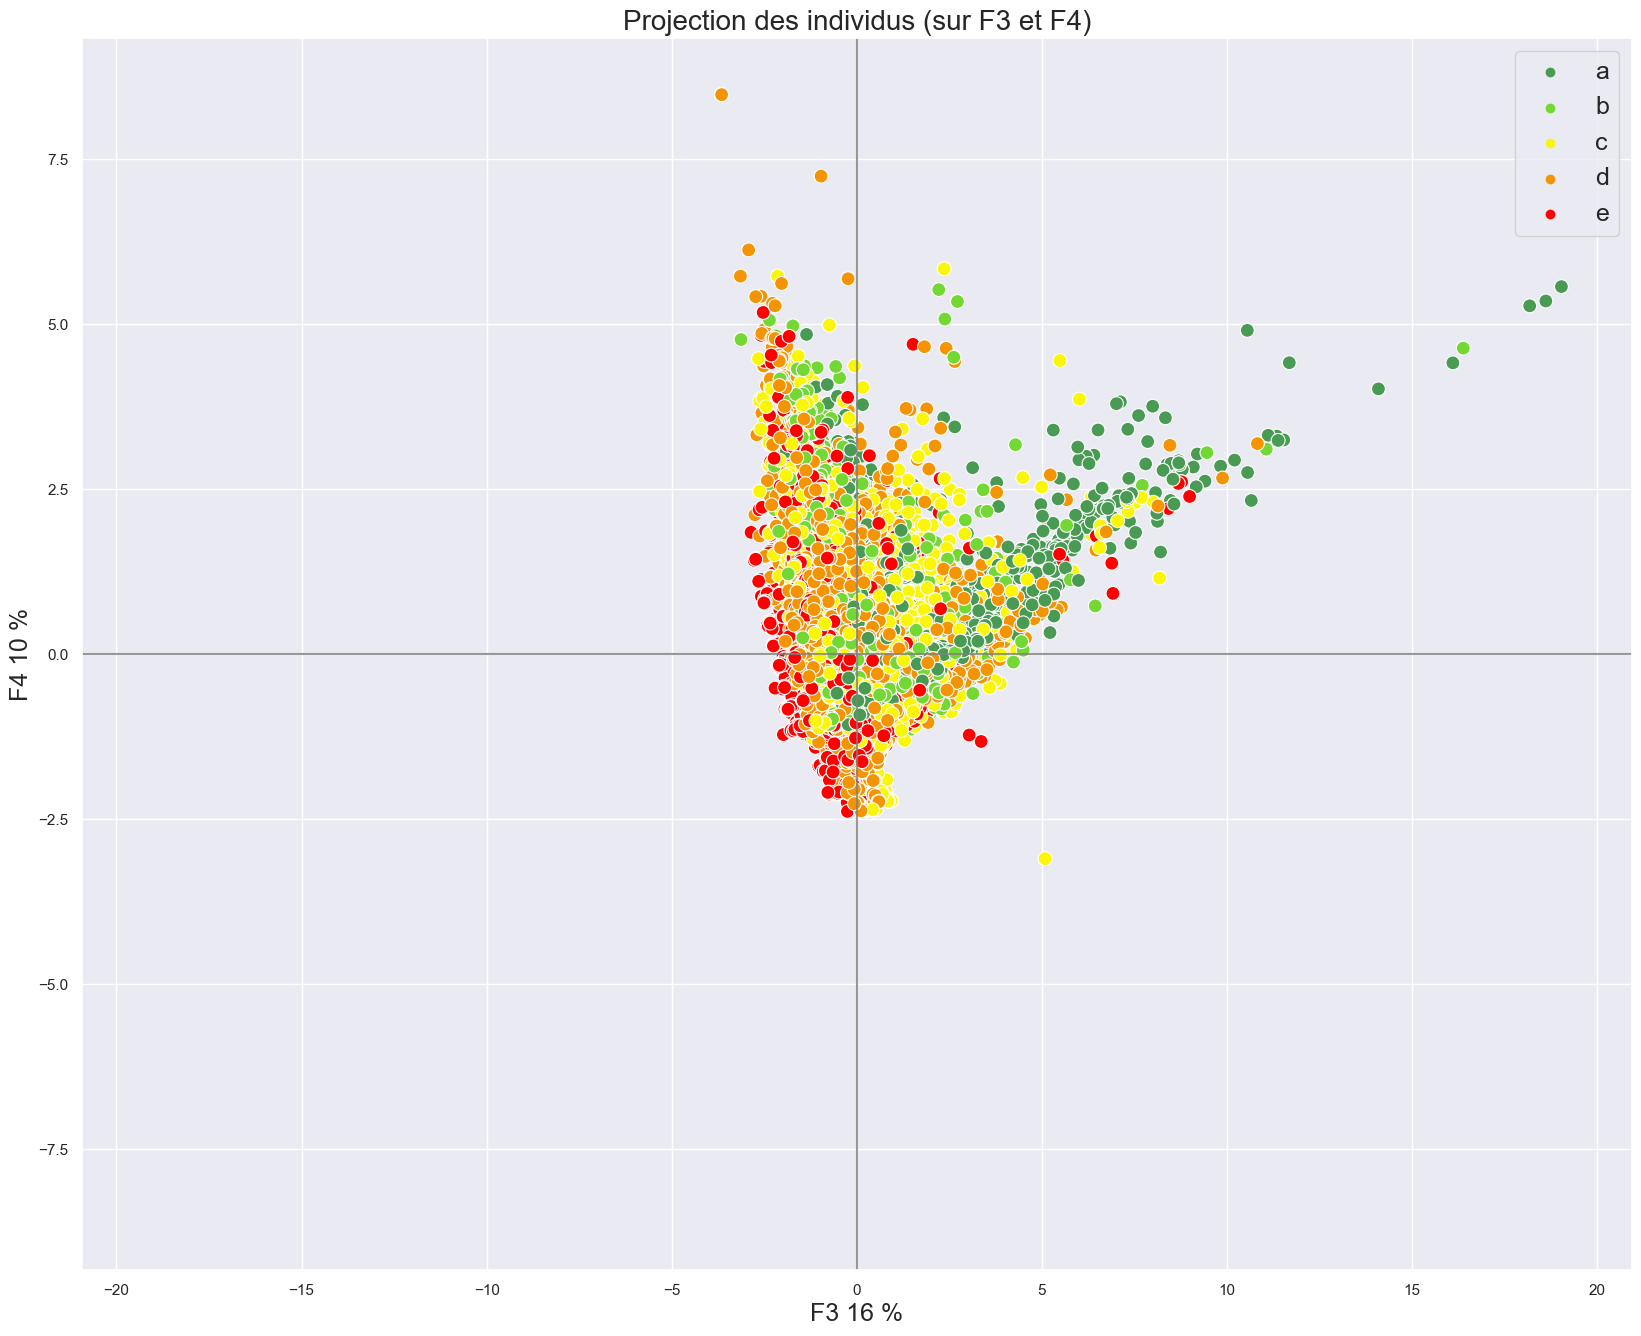

In [45]:
X_proj = pca.transform(X_scaled)
nutrition_labels = df['nutrition_grade_fr'].values

custom_palette = ["#499A53", "#74D834", "#FBF605", "#F49402", "#FF0000"]
sns.set_palette(custom_palette)

display_factorial_planes(X_proj, (0,1), pca, clusters=nutrition_labels, figsize=(20, 16), marker="o")
display_factorial_planes(X_proj, (2,3), pca, clusters=nutrition_labels, figsize=(20, 16), marker="o")

Conclusion de ces projections :

Les projections montrent une séparation nette entre les différents groupes de Nutri-Score. Les produits ayant un A sont regroupés à l'extrémité gauche, tandis que ceux avec un E se trouvent à l'autre extrémité. Cette séparation est particulièrement évidente sur les composantes F1 et F2.

Les produits notés A et B tendent à avoir des profils nutritionnels plus sains, avec moins de sucres et d'additifs, et plus de fibres et de protéines. Pour les additifs, ils jouent un rôle crucial dans la différenciation des produits, en particulier sur F4. Les produits avec un Nutri-Score E ont souvent un nombre plus élevé d'additifs, ce qui contribue à leur classement inférieur.

## ANOVA

In [34]:
# Effectuons une ANOVA avec les variables "additives_n" et "nutrition_grade_fr"

import statsmodels.api as sm
from statsmodels.formula.api import ols

# On crée un modèle linéaire
model = ols('additives_n~nutrition_grade_fr', data=df).fit()

# On effectue une ANOVA
anova_table = sm.stats.anova_lm(model)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
nutrition_grade_fr,4.000,14043.463,3510.866,566.103,0.000
Residual,40806.000,253071.057,6.202,NaN,NaN


In [35]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            additives_n   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     566.1
Date:                Thu, 16 May 2024   Prob (F-statistic):               0.00
Time:                        18:27:37   Log-Likelihood:                -95143.
No. Observations:               40811   AIC:                         1.903e+05
Df Residuals:                   40806   BIC:                         1.903e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   0.8539      0.029     29.157      0.000       0.797       0.911
nutrition_grade_fr[T.b]     1.1006      0.044     24.971      0.000       1.014       1.187
nutrition_grade_fr[T.c]     1.2447      0.040     31.510      0.000       1.167       1.322
nutrition_grade_fr[T.d]     1.6156      0.038     43.075      0.000       1.542       1.689
nutrition_grade_fr[T.e]     1.6570      0.041     40.679      0.000       1.577       1.737
==============================================================================
Omnibus:                    17282.189   Durbin-Watson:                   1.297
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            92832.548
Skew:                           2.000   Prob(JB):                         0.00
Kurtosis:                       9.212   Cond. No.                         6.22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Le nombre d'additifs est significatif sur le résultat du grade nutritionnel, rejetant l'hypothèse nulle que les moyennes de "additives_n" sont les mêmes pour tous les grades nutritionnels.

Plus un produit contient un nombre élevé d'additifs, plus il est susceptible d'avoir un grade nutritionnel bas. Il est tout de même conseillé de faire des analyses supplémentaires intégrant plus de variables, ou de consulter des experts dans le domaine pour plus de pertinence.